# 계층적 군집화 Hierarchical Clustering
- 데이터 포인트들을 계층적으로 그룹화하는 방법
- 트리 형태로 표현되며, Dendrogram이라는 그래프로 시각화
## 1. 용어
### 덴드로그램 Dendrogram
- 계층적 군집화 결과를 트리 구조로 표현한 그래프
- x축을 데이터 포인트, y축은 군집 간 거리 또는 유사도를 나타냄
- 가지branch는 데이터 포인트들이 군집으로 병합되는 순서를 나타냄
- 가지의 높이는 군집 간의 거리를 나타냄
### 링크 Linkage
- 군집간 거리를 측정하는 방법
1. 최단 연결법 Single Linkage : 두 군집 간 가장 가까운 거리 사용
2. 최장 연결법 Complete Linkage : 두 군집 간 가장 먼 거리 사용
3. 평균 연결법 Average Linkage : 두 군집 간 모든 쌍의 평균 거리 사용
4. 중심 연결법 Centroid Linkage : 군집의 중심(평균) 간 거리 사용
## 2. 거리 측정 방법
- 군집화에서 두 데이터 포인트 간의 거리를 측정하는 방법
1. 유클리디안 거리 Euclidean Distance : 두 데이터 간 직선 거리 사용

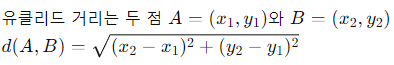

2. 맨해튼 거리 Manhattan Distance : 축을 따라 이동하는 거리
3. 코사인 유사도 Cosine Similarity : 벡터 간 코사인 각도를 사용하여 유사도 측정
## 3. 접근 방법
1. 병합적 군집화 Agglomerative Clustering
- 하향식 접근법 : 각 데이터 포인트를 하나의 군집으로 시작, 가장 가까운 두 군집을 반복적으로 병합하여 최종적으로 하나의 군집이 남을 때까지 반복
2. 분할적 군집화 Divisive Clustering
- 상향식 접근법 : 모든 데이터 포인트를 하나의 군집으로 시작, 이 군집을 반복적으로 나누어 개별 데이터 포인트로 분할
## 4. 계층적 군집화 단계
1. 각 데이터 포인트를 하나의 군집으로 초기화
2. 가장 가까운 두 군집으로 합침
3. 군집 간의 거리 재계산
4. 2,3 단계 반복하여 모든 데이터 포인트가 하나의 군집으로 합쳐질 때까지 반복
## 5. 장점
- 덴드로그램을 통해 군집화 과정을 시각적으로 해석
- 데이터 구조와 상관없이 적용 가능
## 6. 단점
- 큰 데이터 셋에서는 계산 비용 많이 듬
- 군집의 수를 미리 지정하지 않으면 자동으로 결정 되지 않음
## 7. 군집 수 결정 방법
1. 덴드로그램 자르기
- 특정 높이에서 수평선을 그어 군집 수를 결정할 수 있음
2. 사전 지정
- 원하는 군집 수를 지정할 수 있음
3. 최대 군집 수
- 최대 군집 수에 도달할 때까지 병합을 진행


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import AgglomerativeClustering
# 계층적 군집 분석을 위한 모듈
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
df_bts = pd.read_csv(r'Spotify_BTS_AudioFeatures.csv')
df_bts.head()

,Unnamed: 0,Title,Artist,Release,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,1,Like,BTS,2013/6/12,0.582,0.726,0,-4.174,0,0.1160,0.27100,0.000000,0.227,0.768,100.450,1HQHuPpr2s2z3VIBTLtUmv,231883
1,2,No More Dream,BTS,2013/6/12,0.436,0.869,2,-5.174,1,0.4720,0.01240,0.000002,0.494,0.612,167.766,4frlkLwlnm58ejpNwWjxyl,221593
2,3,We Are Bulletproof Pt.2,BTS,2013/6/12,0.754,0.952,8,-5.110,0,0.1530,0.00945,0.000006,0.189,0.868,144.051,2Kspa0jD2MSkaEdonf4Cnb,225360
3,4,Attack on Bangtan,BTS,2013/9/11,0.722,0.961,11,-2.548,0,0.2670,0.20300,0.000000,0.121,0.678,118.016,6bCoSWW1zyQrwQDSMEmsVy,247160
4,5,Coffee,BTS,2013/9/11,0.652,0.794,0,-6.604,1,0.0957,0.00808,0.000000,0.298,0.545,92.045,0Tb8sBQ9fseZbDRzRSxTdi,261453


In [4]:
# 칼럼 성격에 따라 info용 DataFrame과 분석용 DataFrame으로 분리
df_bts_info = df_bts[["Title",	"Artist",	"Release"]]
df_bts_anal = df_bts.drop(["Unnamed: 0", "Title",	"Artist",	"Release", "key",	"id"], axis = 1)

# 분석용 DataFrame 스케일링 진행
scaler = StandardScaler()
df_bts_anal_s = pd.DataFrame(data = scaler.fit_transform(df_bts_anal), columns = df_bts_anal.columns)
df_bts_anal_s["duration"] = df_bts_anal_s["duration_ms"]
df_bts_anal_s = df_bts_anal_s.drop(["duration_ms"], axis = 1)
     

df_bts_anal_s.head()

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration
0,-0.387776,-0.279935,0.329929,-1.123182,-0.090282,1.245994,-0.147170,0.233761,1.198595,-0.756189,0.003835
1,-1.745654,0.747749,-0.271117,0.890327,2.904543,-0.643637,-0.141153,2.051508,0.371794,1.683076,-0.300891
2,1.211917,1.344238,-0.232650,-1.123182,0.220978,-0.665193,-0.123590,-0.024944,1.728596,0.823738,-0.189335
3,0.914300,1.408917,1.307231,-1.123182,1.179995,0.749108,-0.147170,-0.487891,0.721594,-0.119667,0.456246
4,0.263262,0.208754,-1.130613,0.890327,-0.261054,-0.675204,-0.147170,0.717132,0.016693,-1.060753,0.879516


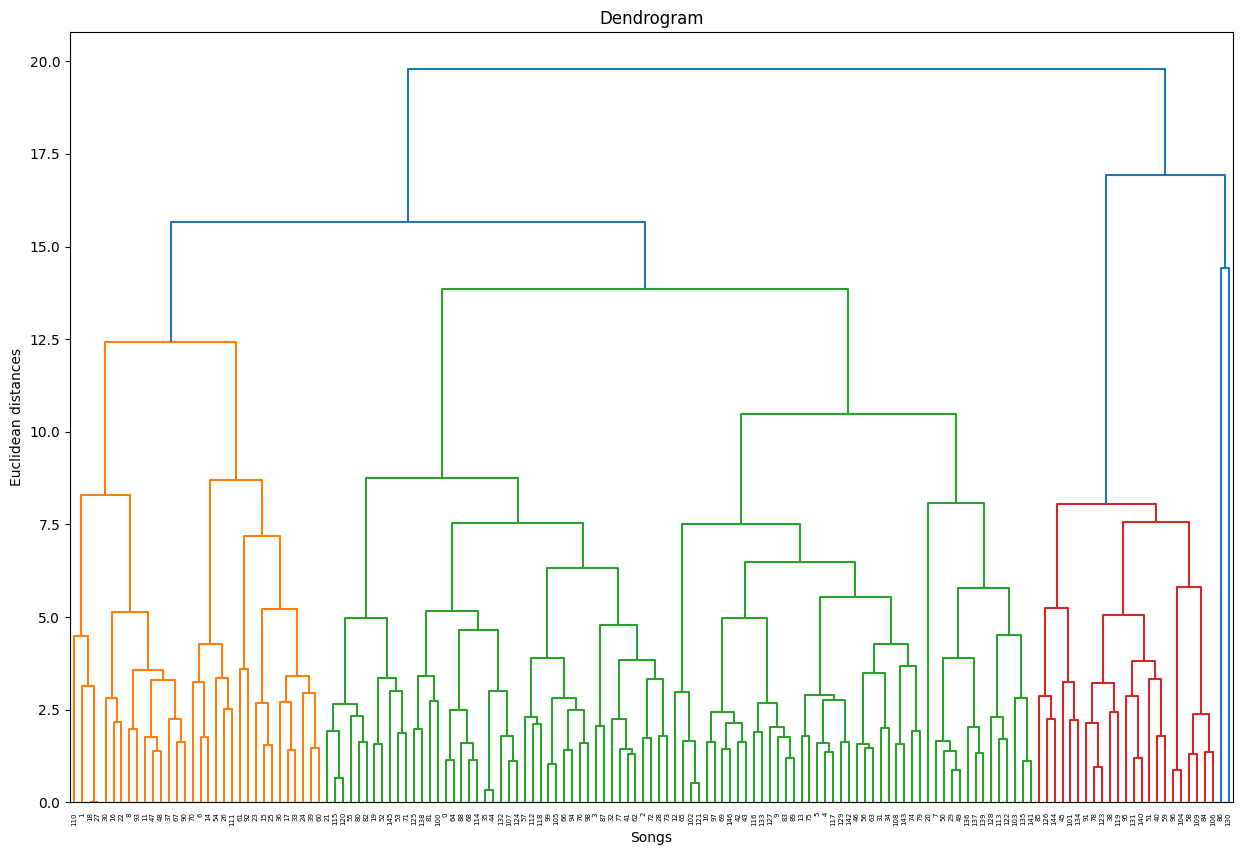

In [5]:
plt.figure(figsize=(15,10))
plt.title('Dendrogram')
plt.xlabel('Songs')
plt.ylabel('Euclidean distances')
# df를 계층적 군집 분석 수행
# method='ward : 워드 연계법을 사용하여 클러스터를 병합
# 총 제곱 오차(Within-cluster variance)를 최소화하는 방식으로 클러스터를 결합
# 클러스터 내의 데이터들이 최대한 비슷하게 유지되도록 함
dgram = dendrogram(linkage(df_bts_anal_s, method = 'ward'))
plt.show()
# x축에 인덱스로 표시됨

In [7]:
# dendrogram의 각 리프 레이블을 DF 특정 정보로 표시하도록 표시
def get_song_info(idx):
  return "{}".format(df_bts_info.iloc[idx]["Title"])

# 인덱스 86번에 해당하는 데이터가 반환되는지 테스트
get_song_info(86)

'Singularity'

C:\Users\utw09\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\utw09\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47336 (\N{HANGUL SYLLABLE RU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\utw09\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47564 (\N{HANGUL SYLLABLE MAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\utw09\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54588 (\N{HANGUL SYLLABLE PI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\utw09\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46400 (\N{HANGUL SYLLABLE DDAM}) m

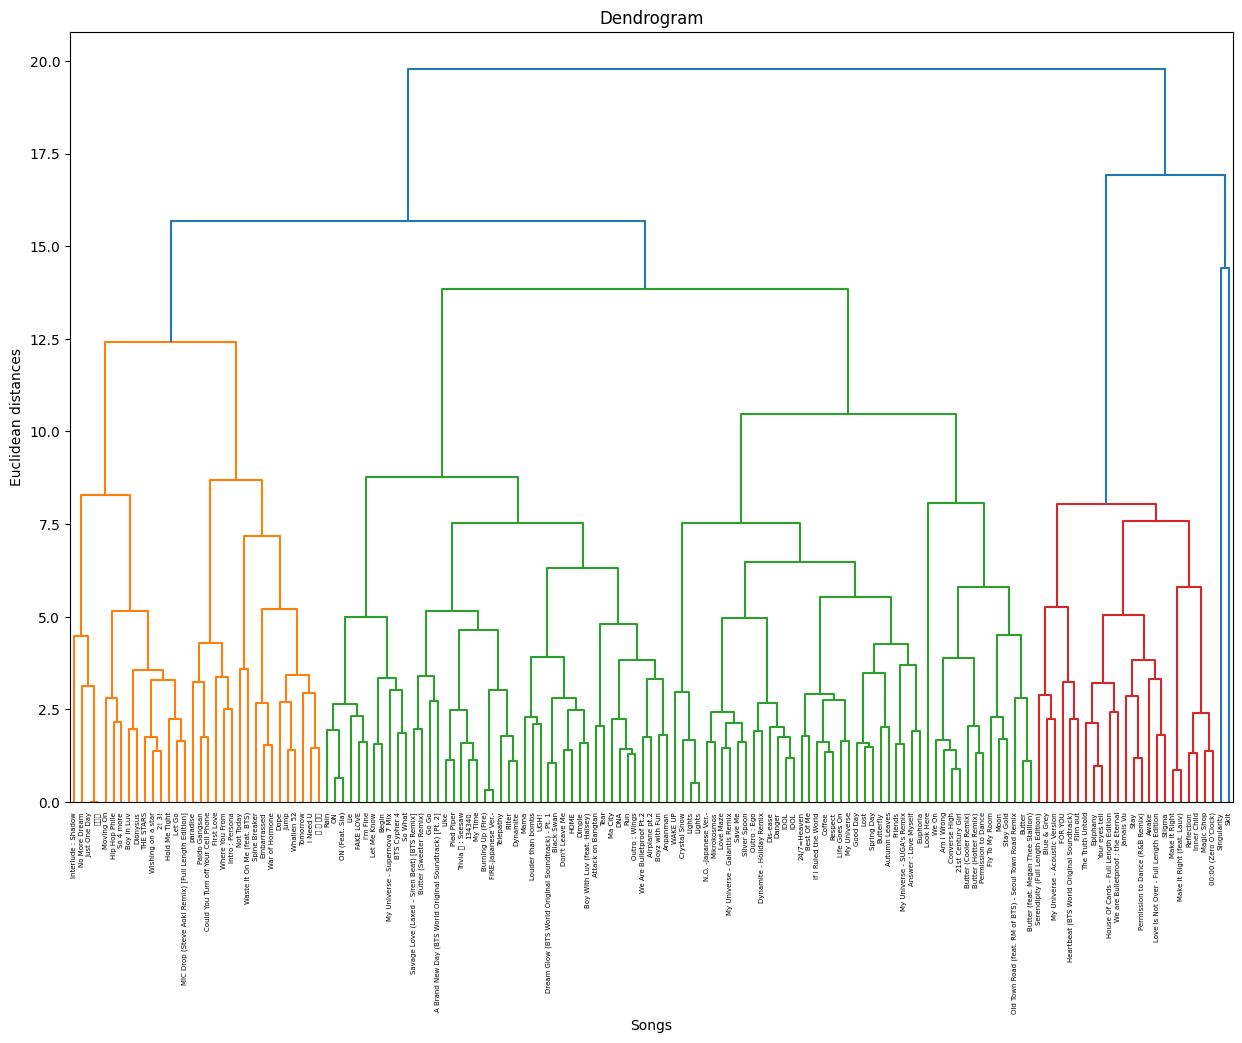

In [8]:
plt.figure(figsize=(15,10))
plt.title('Dendrogram')
plt.xlabel('Songs')
plt.ylabel('Euclidean distances')
dgram = dendrogram(linkage(df_bts_anal_s, method = 'ward'), leaf_label_func = get_song_info)
plt.show()
# x축에 노래 제목 너흠

In [12]:
# 5개의 군집 생성하기 위해 유클리드 거리 사용
# 클러스터 병합 방법으로 워드 연계법 사용
h_clustering = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
h_label = h_clustering.fit_predict(df_bts_anal_s)
h_label

TypeError: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'

affinity 인수가 예상되지 않아 인수 조합이 안됨.

In [10]:
# AgglomerativeClustering 객체 생성 (linkage='ward'와 affinity='euclidean' 기본 조합)
h_clustering = AgglomerativeClustering(n_clusters=5, linkage='ward')

# 군집화 수행 및 레이블 예측
h_label = h_clustering.fit_predict(df_bts_anal_s)
h_label

[0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1
 1 2 1 2 0 0 0 0 2 0 1 1 0 0 2 0 0 1 0 0 0 2 2 1 1 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 2 0 0 0 0 0 2 2 4 0 0 0 1 2 1 1 0 2 2 0 0 0 0 2 0 0 2 0 2 0 0 2 1
 1 0 0 0 0 0 0 0 2 0 0 0 2 0 0 2 0 0 0 3 2 0 0 2 0 0 0 0 0 2 0 0 0 2 0 0]


- 각 데이터 포인트 속한 군집을 보여줌